<a href="https://colab.research.google.com/github/slaimrayane/AI_camp/blob/main/logistic_regression/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

## Data Preprocessing

In [27]:
df = pd.read_csv("Employee.csv")

In [28]:
# Show the first 5 rows of the dataframe.
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [29]:
# Dataframe shape ?
df.shape

(4653, 9)

In [30]:
# infos about df (null values and types)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


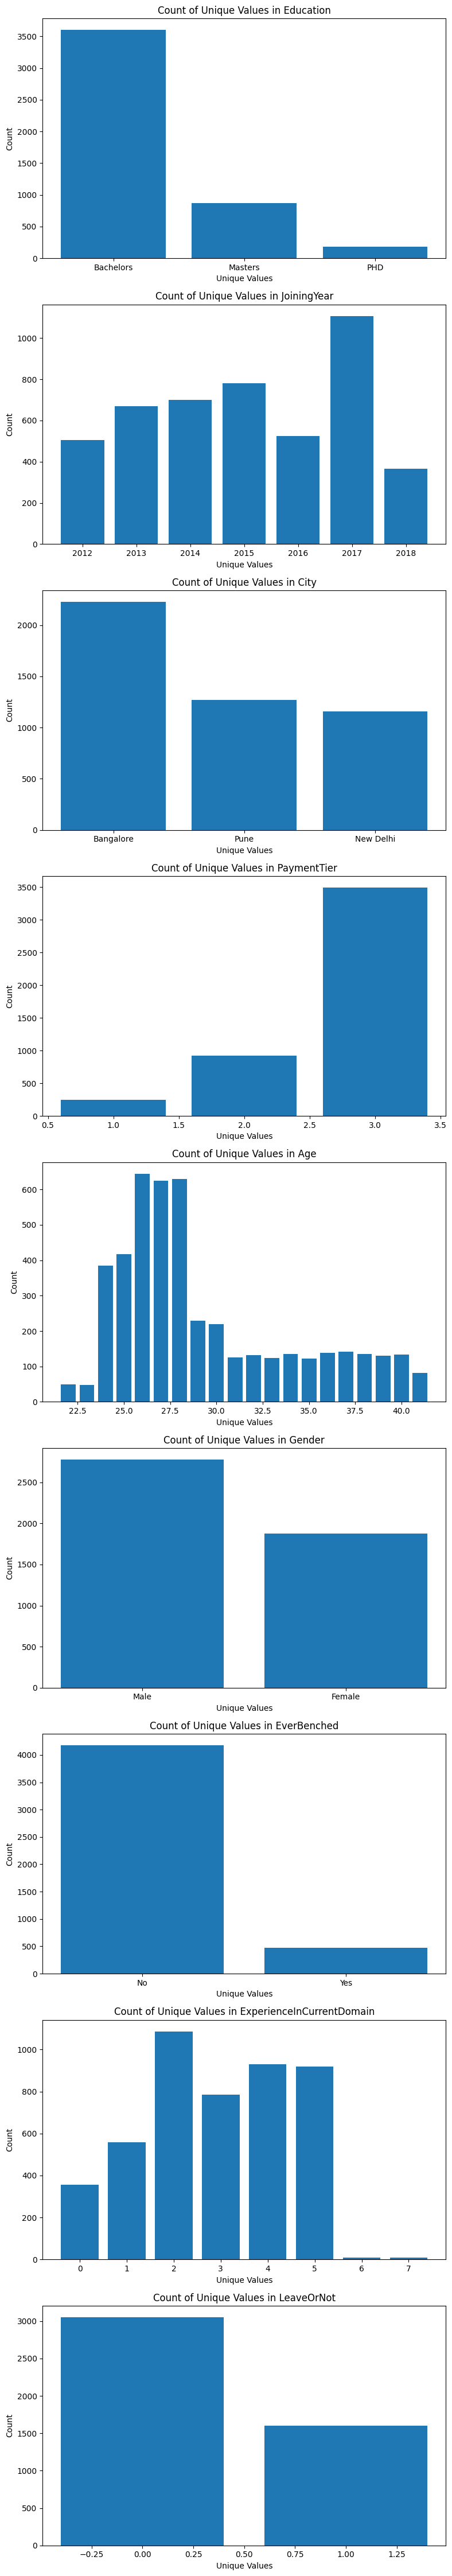

In [31]:
#unique values of df columns

import matplotlib.pyplot as plt


fig, axs = plt.subplots(len(df.columns), figsize=(8, 5 * len(df.columns)))

for i, column in enumerate(df.columns):
    values = df[column]
    value_counts = values.value_counts()

    axs[i].bar(value_counts.index, value_counts)
    axs[i].set_ylabel('Count')
    axs[i].set_xlabel('Unique Values')
    axs[i].set_title(f'Count of Unique Values in {column}')

plt.tight_layout()
plt.show()

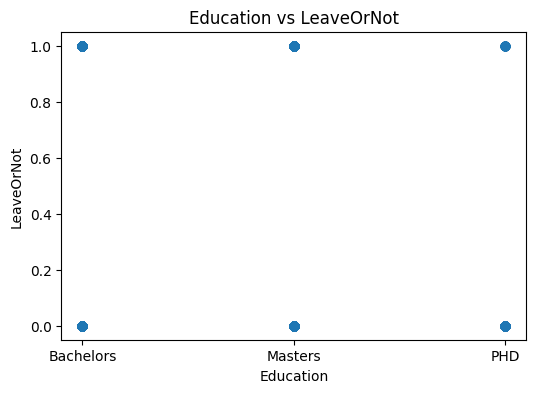

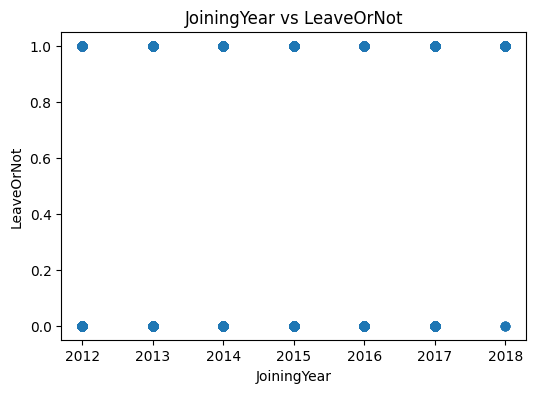

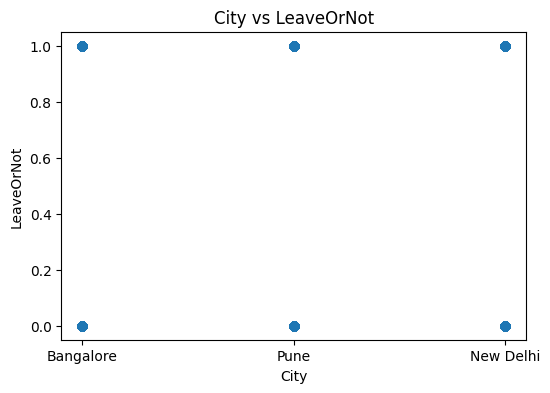

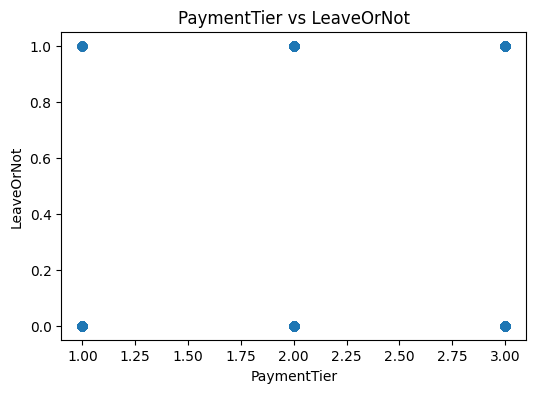

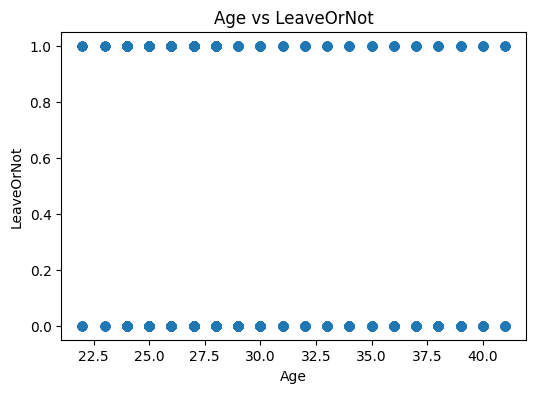

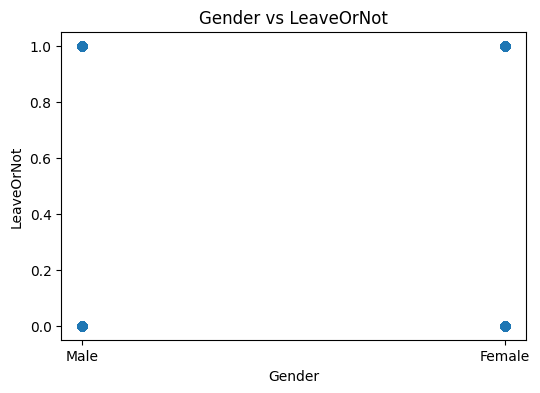

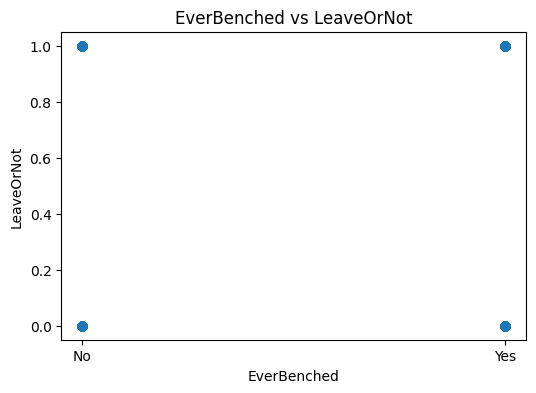

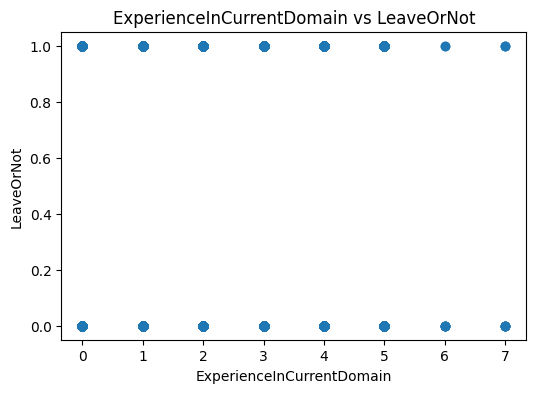

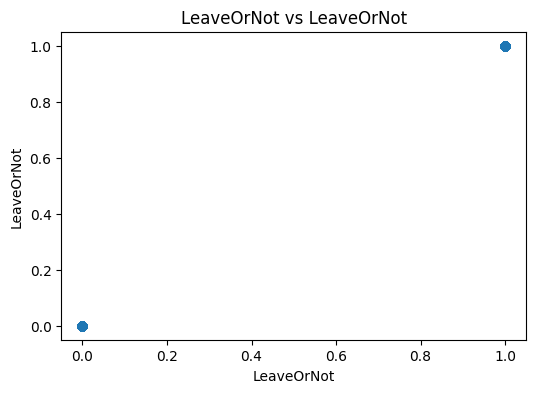

In [32]:
# Features VS Label

for column in df.columns:
    plt.figure(figsize=(6, 4))  # Adjust figure size if needed
    plt.scatter(df[column], df['LeaveOrNot'])
    plt.xlabel(column)
    plt.ylabel('LeaveOrNot')
    plt.title(f'{column} vs LeaveOrNot')
    plt.show()

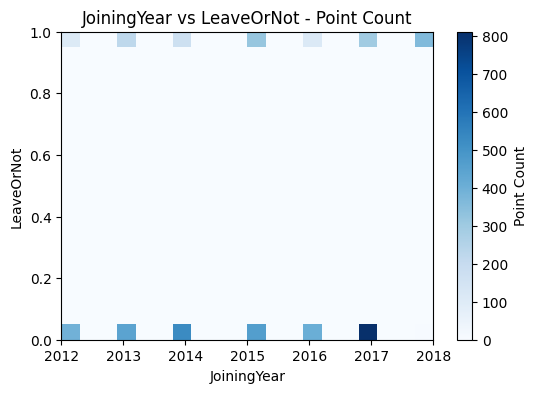

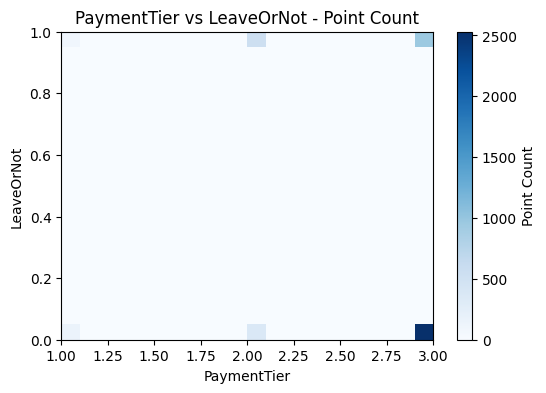

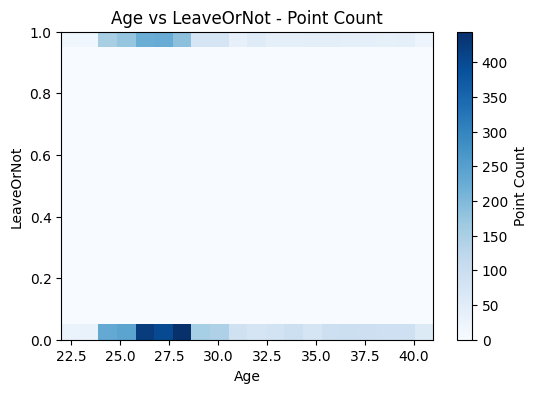

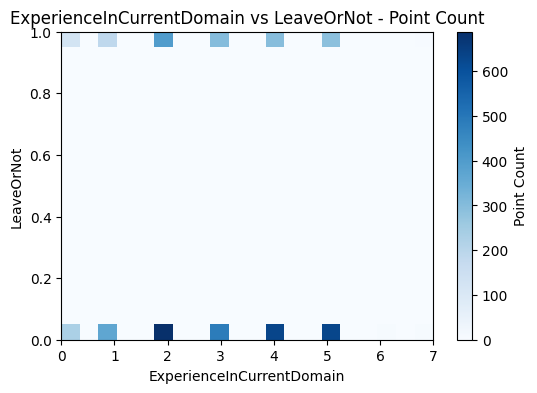

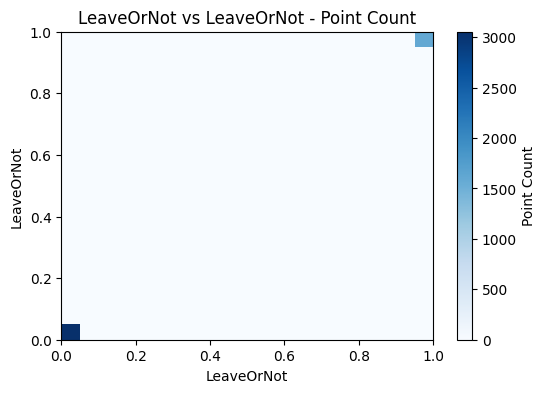

In [33]:
# more details

for column in df.columns:
    if df[str(column)].dtype in [np.float64, np.int64]:  # Checking numeric columns
        # Check for NaNs and finite values
        if df[str(column)].isnull().values.any() or not np.isfinite(df[str(column)]).all():
            print(f"Column '{column}' contains NaNs or non-finite values.")
        else:
            plt.figure(figsize=(6, 4))  # Adjust figure size if needed
            plt.hist2d(df[str(column)], df['LeaveOrNot'], bins=20, cmap='Blues')
            plt.xlabel(str(column))
            plt.ylabel('LeaveOrNot')
            plt.title(f'{column} vs LeaveOrNot - Point Count')
            plt.colorbar(label='Point Count')
            plt.show()

In [34]:
# scale the numerical data

from sklearn.preprocessing import StandardScaler

num_columns = ['JoiningYear','Age']
scaler = StandardScaler()

# Fit and transform the scaler on the numerical columns
df[num_columns] = scaler.fit_transform(df[num_columns])

In [35]:
# show unique values in some categorical columns
# we'll apply one hot encoding after that

categorical_columns = ['Education','City']
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in Education: ['Bachelors' 'Masters' 'PHD']
Unique values in City: ['Bangalore' 'Pune' 'New Delhi']


In [36]:
# create 'EverBenched' column mapping (use education_mapping as refrence)

education_mapping = {'Bachelors': 0, 'Masters': 1, 'PHD': 2}
benched_mapping = {'Yes':1, 'No':0}
# df['Education'] = df['Education'].map(education_mapping)
df['EverBenched'] = df['EverBenched'].map(benched_mapping)

In [37]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,1.039638,Bangalore,3,0.954645,Male,0,0,0
1,Bachelors,-1.107233,Pune,1,-0.288732,Female,0,3,1
2,Bachelors,-0.570515,New Delhi,3,1.783563,Female,0,2,0
3,Masters,0.502921,Bangalore,3,-0.495961,Male,0,5,1
4,Masters,1.039638,Pune,3,-1.117650,Male,1,2,1


In [38]:
#another column contains binary data, what is it ? write it :)
df['Gender'] = df['Gender'].astype('category').cat.codes

In [39]:
# apply one hot encoding on some columns (4 cells before)

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded_city = encoder.fit_transform(df[['Education','City']]).toarray()
encoded_column_names = encoder.get_feature_names_out(['Education','City'])
encoded_df = pd.DataFrame(encoded_city, columns=encoded_column_names)

In [40]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,1.039638,Bangalore,3,0.954645,1,0,0,0
1,Bachelors,-1.107233,Pune,1,-0.288732,0,0,3,1
2,Bachelors,-0.570515,New Delhi,3,1.783563,0,0,2,0
3,Masters,0.502921,Bangalore,3,-0.495961,1,0,5,1
4,Masters,1.039638,Pune,3,-1.117650,1,1,2,1


In [41]:
# concat new columns, and remove unnecessary ones (you can use df.head())

df = df.reset_index(drop=True)
encoded_df = encoded_df.reset_index(drop=True)
df = pd.concat([df, encoded_df], axis=1)
df = df.drop(['Education','City'],axis=1)

In [42]:
df.head()

,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune
0,1.039638,3,0.954645,1,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0
1,-1.107233,1,-0.288732,0,0,3,1,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.570515,3,1.783563,0,0,2,0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.502921,3,-0.495961,1,0,5,1,0.0,1.0,0.0,1.0,0.0,0.0
4,1.039638,3,-1.117650,1,1,2,1,0.0,1.0,0.0,0.0,0.0,1.0


In [45]:
# extract features and labels (what is the label in this case ?)

features = [column for column in df.columns if column != 'LeaveOrNot']
X = df[features]
y = df['LeaveOrNot']

In [48]:
# split data into : 15% test data and 85% train data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [49]:
X_train.head()

,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune
3159,-0.570515,3,1.369104,1,0,4,1.0,0.0,0.0,1.0,0.0,0.0
2752,-1.107233,3,0.125727,1,0,2,0.0,1.0,0.0,1.0,0.0,0.0
2258,1.039638,3,-0.495961,1,1,5,1.0,0.0,0.0,0.0,0.0,1.0
121,-0.033797,3,-0.703191,1,0,4,0.0,0.0,1.0,0.0,1.0,0.0
3589,0.502921,3,1.576334,0,0,1,1.0,0.0,0.0,1.0,0.0,0.0


## Training and Evaluation

In [50]:
# import logistic regression model

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 150)

# train the model
model.fit(X_train,y_train)

LogisticRegression(max_iter=150)

In [53]:
# train accuracy
train_accuracy = model.score(X_train, y_train)

print(f"Training Accuracy: {train_accuracy}")

Training Accuracy: 0.7369693713057496


In [54]:
# classification report

from sklearn.metrics import accuracy_score, classification_report
# predict train data
train_predictions = model.predict(X_train)
report = classification_report(y_train, train_predictions)
print(report)

#predict test data
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(test_accuracy)

              precision    recall  f1-score   support

           0       0.75      0.90      0.82      2433
           1       0.69      0.43      0.53      1289

    accuracy                           0.74      3722
   macro avg       0.72      0.67      0.67      3722
weighted avg       0.73      0.74      0.72      3722

0.7336197636949516


Text(50.722222222222214, 0.5, 'Actual')

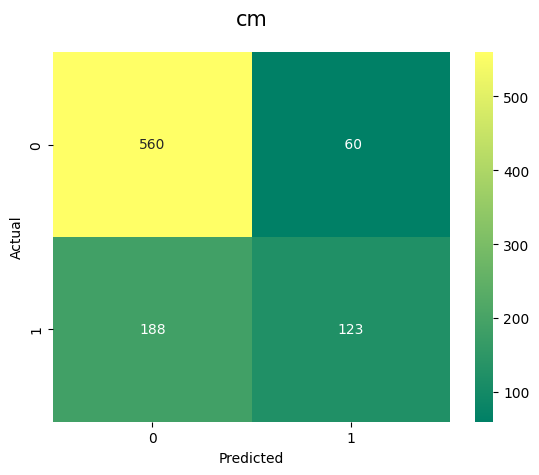

In [55]:
# let's end confusing with confusion_matrix :)

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


cm = confusion_matrix(y_test,test_predictions)
#visualize confusion matrix
sns.heatmap(cm,annot=True,fmt='3.0f',cmap="summer")
plt.title('cm', y=1.05, size=15)
cm
plt.xlabel('Predicted')
plt.ylabel('Actual')

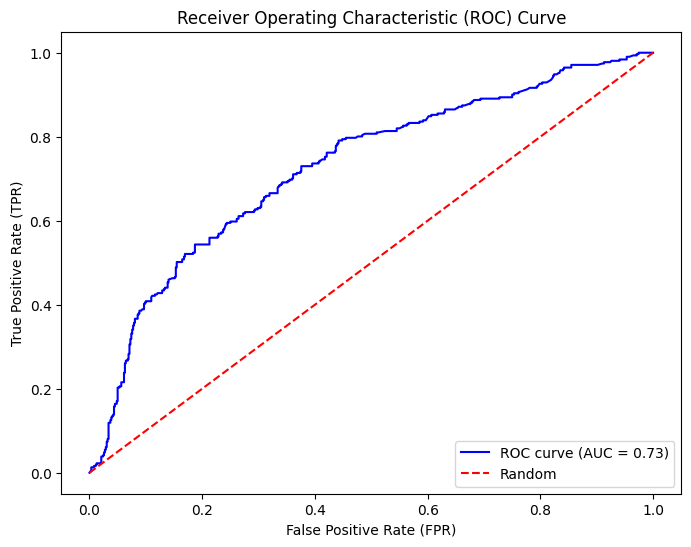

In [57]:
#ROC curve

from sklearn.metrics import roc_curve, auc

y_actual = y_test  # Actual labels
y_probs = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, thresholds = roc_curve(y_actual, y_probs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue',  label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red',  linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()